In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
#function to create time series
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))   # wave1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # wave2
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)   # noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
data = generate_time_series(10000, 51)
data.shape

data = data.reshape(10000, 51)

In [ ]:
X = []
y = []
for lst in data:
    X.append(lst[:50])
    y.append(lst[-1])

X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

# FCNN

In [ ]:
fcnn = keras.Sequential()

fcnn.add(keras.layers.Input(shape = X_train[0].shape))
fcnn.add(keras.layers.Dense(256, activation = 'relu'))
fcnn.add(keras.layers.Dense(128, activation = 'relu'))
fcnn.add(keras.layers.Dense(1, activation = 'linear'))

In [ ]:
fcnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
fcnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-4), loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
history_fcnn = fcnn.fit(X_train, y_train, batch_size = 8, epochs = 25, validation_split = 0.2)

Epoch 1/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.00

Text(0, 0.5, 'Loss')

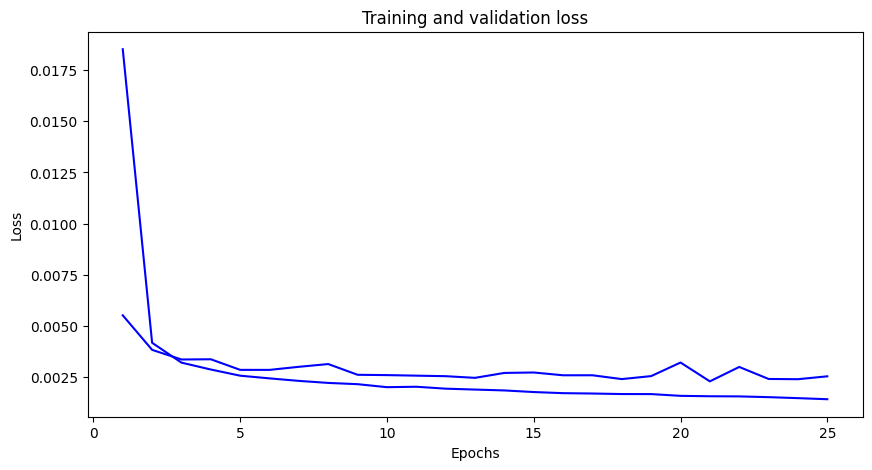

In [ ]:
loss, mean_squared_error, val_loss, val_mean_squared_error = history_fcnn.history['loss'], history_fcnn.history['mean_squared_error'], history_fcnn.history['val_loss'], history_fcnn.history['val_mean_squared_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize = (10, 5))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Mean Squared Error')

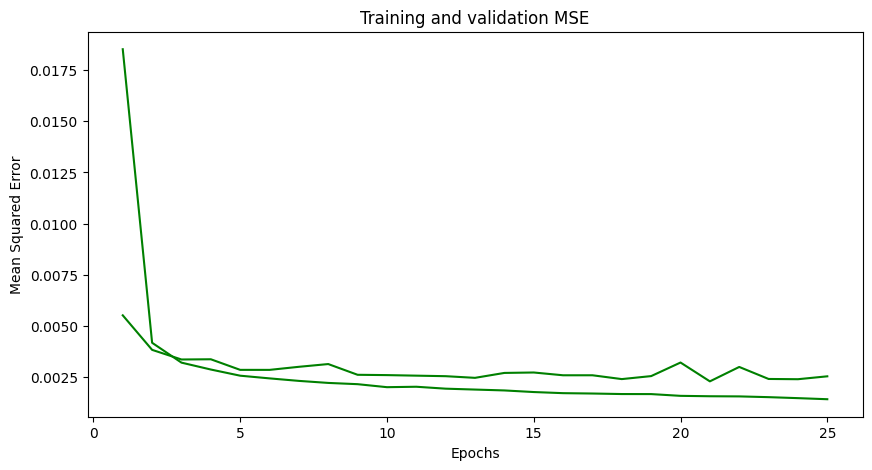

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(epochs, mean_squared_error, 'g', label = 'Training error')
plt.plot(epochs, val_mean_squared_error, 'g', label = 'Validation error')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

# RNN 1


In [ ]:
rnn = keras.Sequential()

input_shape = (50, 1)

rnn.add(keras.layers.Input(shape = input_shape))
rnn.add(keras.layers.SimpleRNN(128, return_sequences = False, activation='relu'))
rnn.add(keras.layers.Dense(1, activation = 'linear'))

In [ ]:
rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-4), loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
history_rnn = rnn.fit(X_train, y_train, batch_size = 8, epochs = 25, validation_split = 0.2)

Epoch 1/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 3/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss:

Text(0, 0.5, 'Loss')

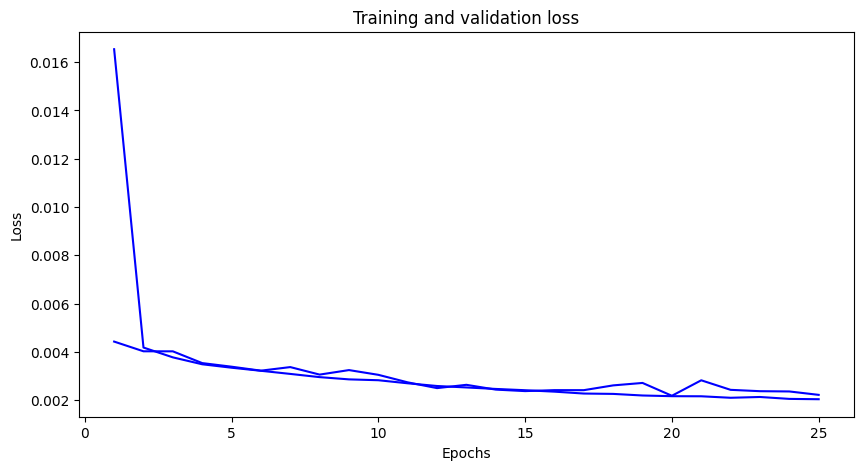

In [ ]:
loss, mean_squared_error, val_loss, val_mean_squared_error = history_rnn.history['loss'], history_rnn.history['mean_squared_error'], history_rnn.history['val_loss'], history_rnn.history['val_mean_squared_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize = (10, 5))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Mean Squared Error')

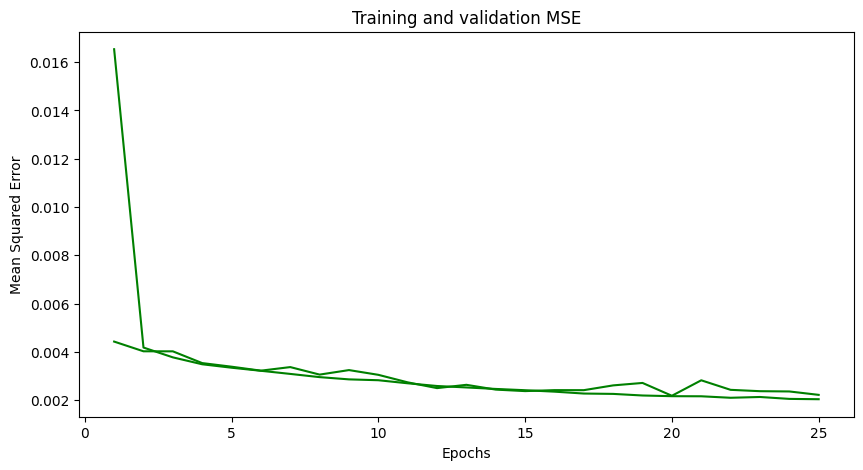

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(epochs, mean_squared_error, 'g', label = 'Training error')
plt.plot(epochs, val_mean_squared_error, 'g', label = 'Validation error')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

# RNN 2

In [ ]:
rnn2 = keras.Sequential()

input_shape = (50, 1)

rnn2.add(keras.layers.Input(shape = input_shape))
rnn2.add(keras.layers.SimpleRNN(128, return_sequences = True, activation='relu'))
rnn2.add(keras.layers.SimpleRNN(64, activation = 'relu'))
rnn2.add(keras.layers.Dense(1, activation = 'linear'))

In [ ]:
rnn2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn2.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-4), loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
history_rnn2 = rnn2.fit(X_train, y_train, batch_size = 8, epochs = 25, validation_split = 0.2)

Epoch 1/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - 

Text(0, 0.5, 'Loss')

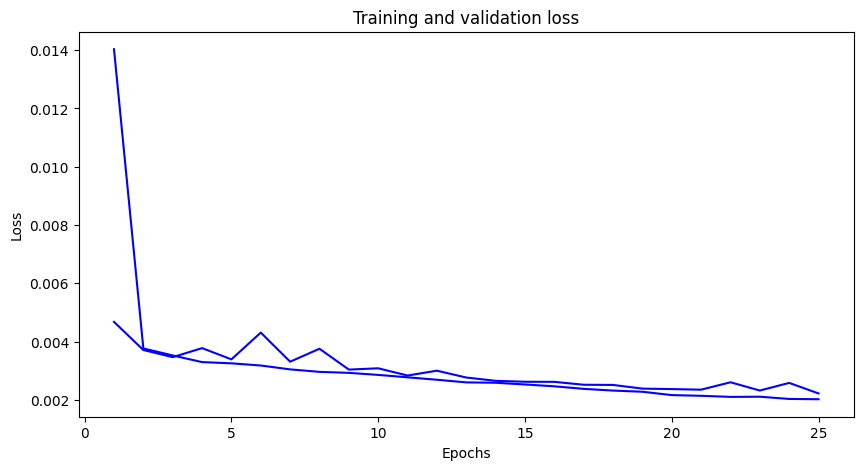

In [ ]:
loss, mean_squared_error, val_loss, val_mean_squared_error = history_rnn2.history['loss'], history_rnn2.history['mean_squared_error'], history_rnn2.history['val_loss'], history_rnn2.history['val_mean_squared_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize = (10, 5))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Mean Squared Error')

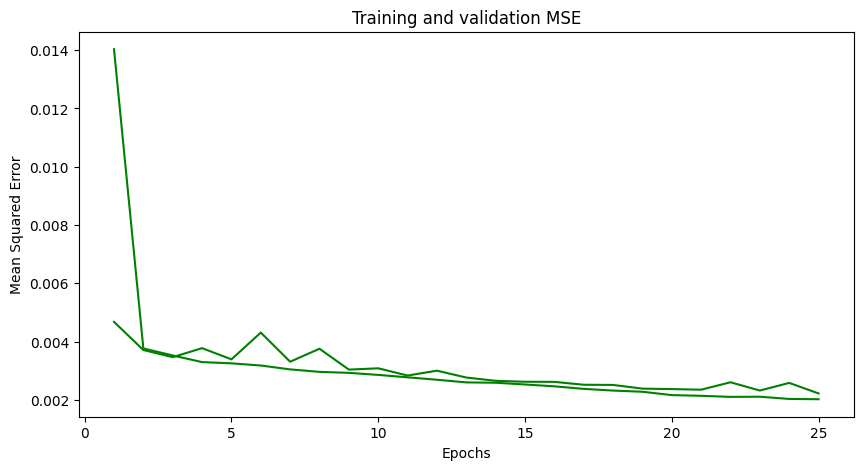

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(epochs, mean_squared_error, 'g', label = 'Training error')
plt.plot(epochs, val_mean_squared_error, 'g', label = 'Validation error')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

# Testing

In [ ]:
fcnn_preds = fcnn.predict(X_test)
rnn_preds = rnn.predict(X_test)
rnn2_preds = rnn2.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [ ]:
fcnn_loss, fcnn_mean_squared_error = fcnn.evaluate(X_test, y_test)
rnn_loss, rnn_mean_squared_error = rnn.evaluate(X_test, y_test)
rnn2_loss, rnn2_mean_squared_error = rnn2.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_squared_error: 0.0026
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_squared_error: 0.0022
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020 - mean_squared_error: 0.0020


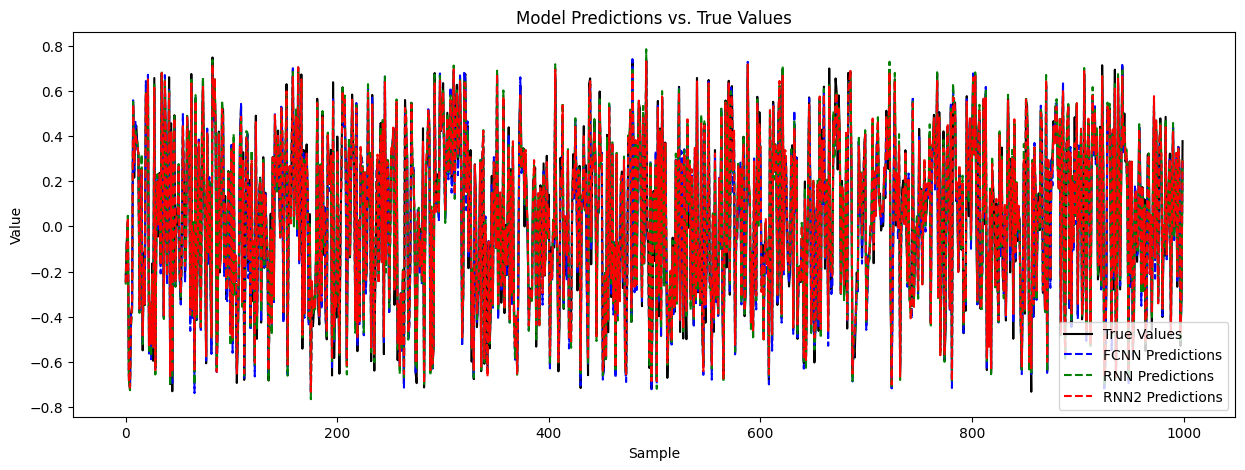

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(y_test, label='True Values', color='black')

plt.plot(fcnn_preds, label='FCNN Predictions', color='blue', linestyle='--')
plt.plot(rnn_preds, label='RNN Predictions', color='green', linestyle='--')
plt.plot(rnn2_preds, label='RNN2 Predictions', color='red', linestyle='--')

plt.title("Model Predictions vs. True Values")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.show()
